<a href="https://colab.research.google.com/github/Tbharvesh/DeepLearningProject/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# !unzip -q dataset.zip
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# %cd https://drive.google.com/drive/folders/11jXIcJ6MF3R_FbeMQigZ5PeQSEpYmurO?usp=drive_link


In [ ]:
#loading image datasets

train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/Covid19-dataset/train',
    image_size=(256, 256),
    batch_size=32,
    )
test_dataset=image_dataset_from_directory(
    '/content/drive/My Drive/Covid19-dataset/test',
    image_size=(256, 256),
    batch_size=32)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    # layers.experimental.preprocessing.shear
    layers.experimental.preprocessing.RandomZoom(0.2),
])

# Applying data augmentation to dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
import tensorflow as tf
from torch.utils.data import Dataset

# Assuming dataset is your Dataset object
DATASET_SIZE = len(train_dataset)
print(DATASET_SIZE )
VAL_SPLIT = 0.2  # Using 20% of the data for validation

# Calculate the number of examples in the validation set
val_size = int(DATASET_SIZE * VAL_SPLIT)

# Shuffle the dataset (make sure to use a buffer size large enough for your data)
shuffled_dataset = train_dataset.shuffle(buffer_size=DATASET_SIZE)

# Split the dataset into training and validation sets
val_dataset = shuffled_dataset.take(val_size)
train_dataset = shuffled_dataset.skip(val_size)

# Apply data augmentation only to the training dataset
augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# No augmentation for validation dataset
# Depending on your setup, you might want to apply non-randomized data preprocessing here as well
val_dataset = val_dataset.map(lambda x, y: (data_augmentation(x, training=False), y))


6


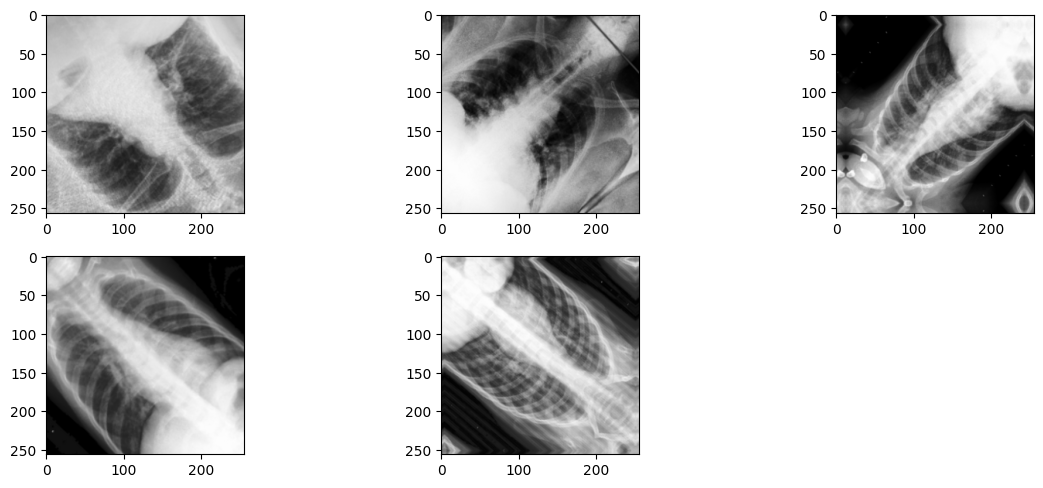

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 5):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in augmented_train_dataset:
        image = X_batch[0]  #First img is taken from every batch
        plt.imshow(image)
        # plt.title(str(label.numpy()))
        break
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(12, 12))
# for i, (image, label) in enumerate(augmented_train_dataset.take(5)):
#     ax = plt.subplot(5, 3, i + 1)
#     plt.imshow(image.numpy())
#     plt.title(str(label.numpy()))
#     plt.axis("off")
# plt.tight_layout()
# plt.show()

num_train =20
num_validation =20
epochs =20
batch_size= 32

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, 256, 256)
else:
    input_shape=(256,256,3)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Layers of CNN Model


1.   Convolutional
2.   ReLu
3.   Pooling
4.   Dense





In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  #Multidim arr--->1D
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 64)                66064448  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

## Compiling the basic CNN model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 activation (Activation)     (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1032256)           0         
                                                                 
 dense (Dense)               (None, 64)                66064448  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                      

## Fit the Model

In [ ]:
augmented_train_dataset_repeated = augmented_train_dataset.repeat()
val_dataset_repeated = val_dataset.repeat()
training = model.fit_generator(augmented_train_dataset,
                   steps_per_epoch=num_train,epochs=epochs,validation_data=val_dataset,validation_steps=num_validation)


Epoch 1/20


<ipython-input-32-e56a822f5f79>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(augmented_train_dataset,


 7/20 [=========>....................] - ETA: 1:01 - loss: -23.7540 - accuracy: 0.3562

20/20 [==============================] - 44s 2s/step - loss: -23.7540 - accuracy: 0.3562 - val_loss: -2.1970 - val_accuracy: 0.2812


## Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


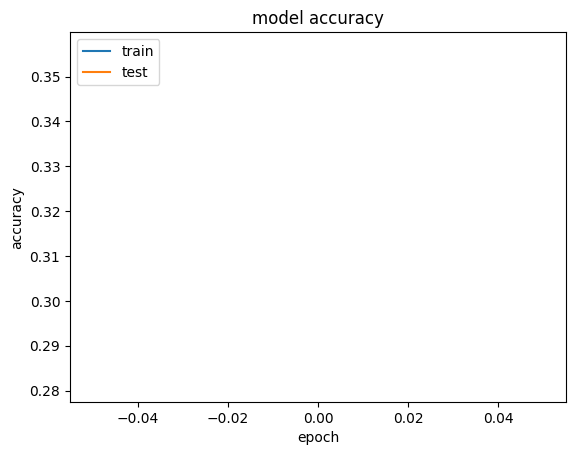

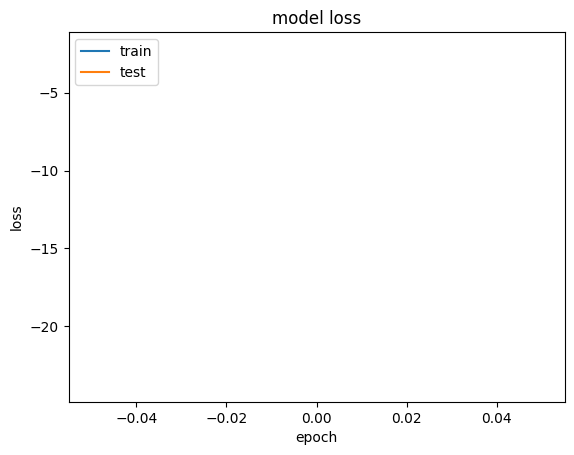

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()